In [19]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

from tdameritrade import TDAmeritrade

In [31]:
def calc_differentials(bars):
    """
    Calculate the price differentials:
        cc_{i} = (close_price_{i} - previous_close_price_{i}) / previous_close_price_{i}
        co_{i} = (open_price_{i} - close_price_{i-1}) / close_price_{i-1}
        oc_{i} = (close_price_{i} - open_price_{i}) / open_price_{i}
        high_{i} = (high_{i} - open_price_{i}) / open_price_{i}
        low_{i} = (low_{i} - open_price_{i}) / open_price_{i}
    
    bars: Pandas Panel [items: bars, major_axis: dates, minor_axis: asset_ids]
    
                    
    returns Pandas Panel [items: [cc, oc, co, high, low], major_axis: dates, minor-axis: asset_ids]
    """
    
    open_price = bars.open_price.iloc[1:].values
    close_price = bars.close_price.iloc[1:].values
    high = bars.high.iloc[1:].values
    low = bars.low.iloc[1:].values
    previous_close_price = bars.close_price.iloc[:-1].values
    
    cc = (close_price - previous_close_price) / previous_close_price
    co = (open_price - previous_close_price) / previous_close_price
    oc = (close_price - open_price) / open_price
    high = (high - open_price) / open_price
    low = (low - open_price) / open_price
    
    data = pd.Panel(data=np.array([cc, co, oc, high, low]), 
                    items=["cc", "co", "oc", "high", "low"],
                    major_axis=bars.open_price.iloc[1:].index,
                    minor_axis=bars.minor_axis)
    
    return data

In [95]:
td = TDAmeritrade(filename_account="account_no.txt", filename_oauth="oAuth_hash.txt")

In [10]:
symbols = td.get_commission_free_etfs()

https://api.tdameritrade.com/v1/accounts/884026117/watchlists/1148189253


In [56]:
t = dict()
for sym in symbols:
    t[sym] = td.get_price_history(symbol=sym, period=6)

https://api.tdameritrade.com/v1/marketdata/SPLG/pricehistory?periodType=month&period=6&frequencyType=daily&frequency=1&endDate=1532090036015&needExtendedHoursData=true
https://api.tdameritrade.com/v1/marketdata/SPTM/pricehistory?periodType=month&period=6&frequencyType=daily&frequency=1&endDate=1532090036015&needExtendedHoursData=true
https://api.tdameritrade.com/v1/marketdata/SPYG/pricehistory?periodType=month&period=6&frequencyType=daily&frequency=1&endDate=1532090036015&needExtendedHoursData=true
https://api.tdameritrade.com/v1/marketdata/SPYV/pricehistory?periodType=month&period=6&frequencyType=daily&frequency=1&endDate=1532090036015&needExtendedHoursData=true
https://api.tdameritrade.com/v1/marketdata/SPMD/pricehistory?periodType=month&period=6&frequencyType=daily&frequency=1&endDate=1532090036015&needExtendedHoursData=true
https://api.tdameritrade.com/v1/marketdata/SPSM/pricehistory?periodType=month&period=6&frequencyType=daily&frequency=1&endDate=1532090036015&needExtendedHoursDa

In [78]:
bars = pd.Panel.from_dict(t)
bars = bars.swapaxes(axis1=0, axis2=2)
bars = bars.fillna(method="backfill")
bars.items = ["open_price", "high", "low", "close_price", "volume"]
dbars = calc_differentials(bars)

/home/brent/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.
/home/brent/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  
/home/brent/miniconda3/lib/python3.5/site

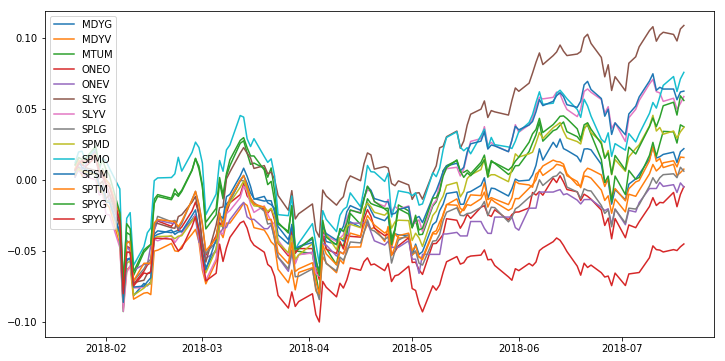

In [79]:
fig, ax = plt.subplots(figsize=(12,6))
dbars.cc.cumsum(axis=0).plot(ax=ax)
ax.legend(loc="upper left")

In [81]:
dbars.cc.sum(axis=0)

MDYG    0.021872
MDYV    0.007507
MTUM    0.037219
ONEO   -0.004797
ONEV   -0.005143
SLYG    0.108504
SLYV    0.058541
SPLG    0.006072
SPMD    0.036827
SPMO    0.075532
SPSM    0.062347
SPTM    0.015685
SPYG    0.055756
SPYV   -0.045122
dtype: float64

In [98]:
td.get_quotes(symbols=["SPYV"])

https://api.tdameritrade.com/v1/marketdata/quotes?symbol=SPYV


HTTPError: HTTP Error 401: Unauthorized

In [85]:
td.message

{'SPYV': {'52WkHigh': 32.54,
  '52WkLow': 28.0525,
  'askId': 'T',
  'askPrice': 30.22,
  'askSize': 1300,
  'assetType': 'ETF',
  'bidId': 'P',
  'bidPrice': 30.21,
  'bidSize': 400,
  'bidTick': ' ',
  'closePrice': 30.29,
  'delayed': False,
  'description': 'SPDR Series Trust SPDR Portfolio S&P 500 Value ETF',
  'digits': 4,
  'divAmount': 0.729,
  'divDate': '2018-06-18 00:00:00.0',
  'divYield': 2.41,
  'exchange': 'p',
  'exchangeName': 'Pacific',
  'highPrice': 30.24,
  'lastId': 'D',
  'lastPrice': 30.2134,
  'lastSize': 2300,
  'lowPrice': 30.1895,
  'marginable': True,
  'mark': 30.2134,
  'nAV': 0.0,
  'netChange': -0.0766,
  'openPrice': 30.23,
  'peRatio': 0.0,
  'quoteTimeInLong': 1532093889454,
  'regularMarketLastPrice': 30.2134,
  'regularMarketLastSize': 23,
  'regularMarketNetChange': -0.0766,
  'regularMarketTradeTimeInLong': 1532093875665,
  'securityStatus': 'Normal',
  'shortable': True,
  'symbol': 'SPYV',
  'totalVolume': 10268,
  'tradeTimeInLong': 1532093875

In [92]:
30.22*.998

30.15956

In [96]:
td.place_order(symbol="SPYV", price=30.16, quantity=2, instruction="BUY")

https://api.tdameritrade.com/v1/accounts/884026117/orders


In [97]:
td.create_saved_order(symbol="SPYV", price=30.16, quantity=2, instruction="BUY")

https://api.tdameritrade.com/v1/accounts/884026117/savedorders
